# log normal distribution

In [26]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
x = np.random.normal(0, 0.5, 1000)
x[:10]
x2 = np.random.normal(0, 1, 1000)

In [31]:
Y = np.exp(x)
Y2 = np.exp(x2)
Y[:10]

array([1.02939638, 1.03049098, 0.96657863, 1.07461381, 1.36869074,
       0.56359078, 1.06948225, 1.18211271, 0.78289874, 0.81237263])

(array([ 3., 10.,  8., 15., 13., 21., 25., 29., 30., 30., 43., 35., 31.,
        41., 42., 35., 25., 41., 34., 35., 28., 30., 30., 35., 22., 25.,
        21., 15., 13., 24., 22., 17., 15., 12., 12., 12., 10.,  9.,  7.,
         5.,  7.,  5.,  5.,  6.,  8.,  6.,  4.,  3.,  2.,  5.,  5.,  1.,
         4.,  0.,  2.,  2.,  2.,  2.,  1.,  2.,  1.,  1.,  1.,  0.,  2.,
         1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([0.23964397, 0.28162115, 0.32359832, 0.3655755 , 0.40755267,
        0.44952984, 0.49150702, 0.53348419, 0.57546137, 0.61743854,
        0.65941571, 0.70139289, 0.74337006, 0.78534724, 0.82732441,
        0.86930159, 0.91127876, 0.95325593, 0.99523311, 1.03721028,
        1.07918746, 1.12116463, 1.16314181, 1.20511898, 1.24709615,
        1.28907333, 1.3310505 , 1.37302768, 1.41500485, 1.45698203,
        1.4989592 , 1.54093637,

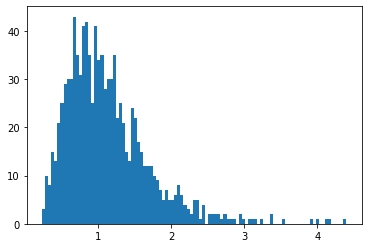

In [25]:
%matplotlib inline

bi = np.linspace(np.min(Y), np.max(Y), 100)
plt.hist(Y, bins = bi)

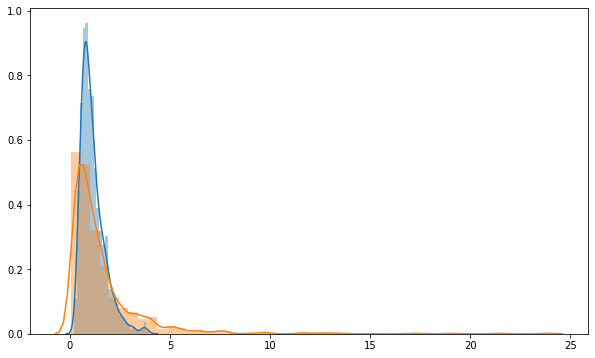

In [35]:
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(Y)
sns.distplot(Y2)


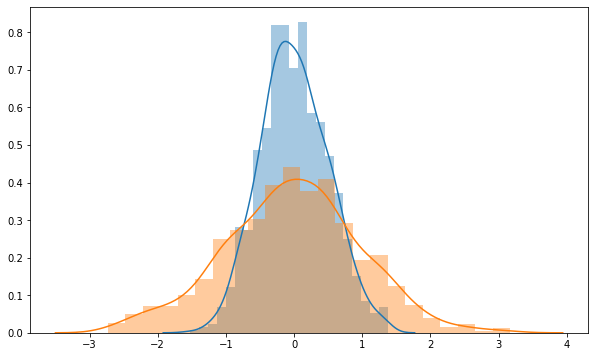

In [38]:
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(np.log(Y))
sns.distplot(np.log(Y2))

# Quantile Regression

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
housedata = pd.read_csv("house_pricing_MagicBricks.csv")

In [3]:
housedata

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
0,950.0,2,2.0,Furnished,Karol Bagh,Central Delhi,"DDA MIG Flats Prasad Nagar Phase 2, Prasad Nag...",1.0,Ready_to_move,Resale,Apartment,8761.0,12500000
1,535.0,2,1.0,Furnished,Karol Bagh,Central Delhi,"Dev Nagar, Karol Bagh",1.0,Ready_to_move,New_Property,Apartment,7290.0,3900000
2,1280.0,3,3.0,Furnished,Karol Bagh,Central Delhi,Karol Bagh,2.0,Ready_to_move,Resale,Builder_Floor,14092.0,15000000
3,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,22222.0,25000000
4,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,22222.0,25000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,4688.0,5,4.0,Unfurnished,Patel Nagar,West Delhi,"The Leela Sky Villas, Patel Nagar",1.0,Almost_ready,New_Property,Apartment,28797.0,135000000
1210,3901.0,4,4.0,Unfurnished,Patel Nagar,West Delhi,"The Leela Sky Villas, Patel Nagar",1.0,Almost_ready,New_Property,Apartment,23840.0,93000000
1211,2306.0,3,3.0,Unfurnished,Patel Nagar,West Delhi,"The Leela Sky Villas, Patel Nagar",1.0,Almost_ready,New_Property,Apartment,24718.0,57000000
1212,675.0,2,1.0,Unfurnished,Uttam Nagar,West Delhi,Uttam Nagar,1.0,Ready_to_move,Resale,Builder_Floor,5794.0,2900000


In [4]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1214 non-null   float64
 1   BHK          1214 non-null   int64  
 2   Bathroom     1212 non-null   float64
 3   Furnishing   1214 non-null   object 
 4   Location     1214 non-null   object 
 5   District     1214 non-null   object 
 6   Locality     1214 non-null   object 
 7   Parking      1182 non-null   float64
 8   Status       1214 non-null   object 
 9   Transaction  1214 non-null   object 
 10  Type         1209 non-null   object 
 11  Per_Sqft     973 non-null    float64
 12  Price        1214 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 123.4+ KB


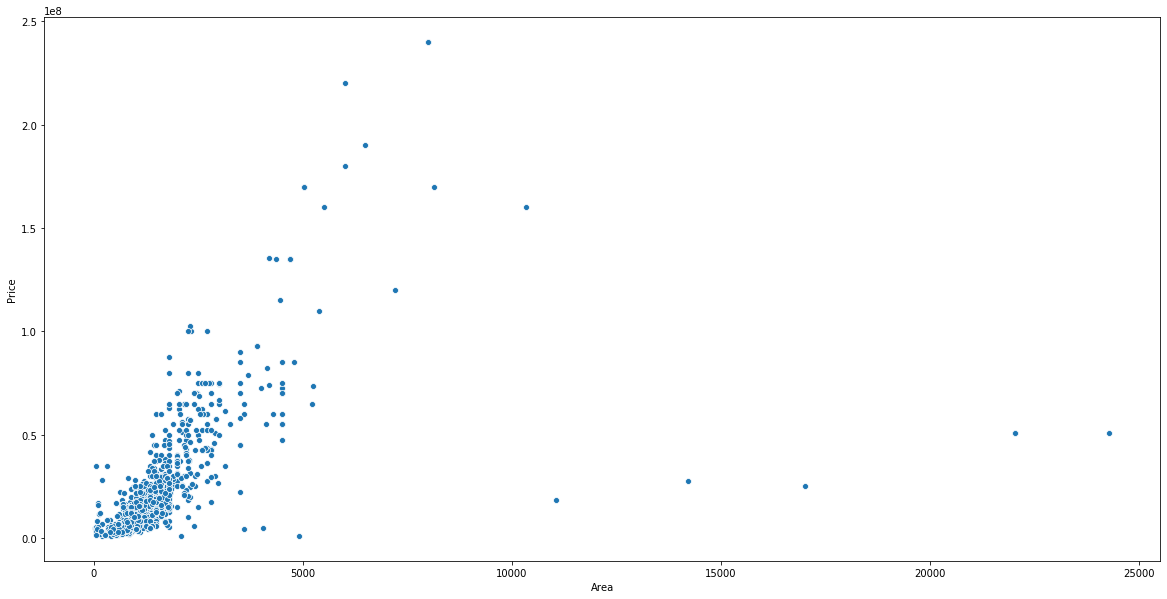

In [5]:
from pylab import rcParams

rcParams['figure.figsize'] = 20, 10
sns.scatterplot(housedata["Area"], housedata["Price"])

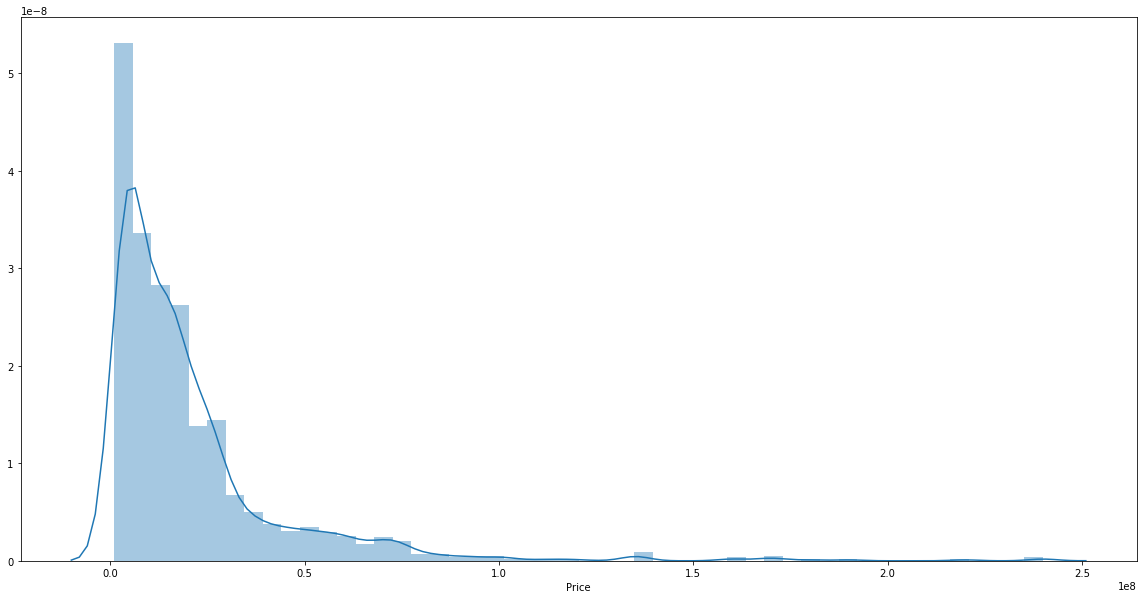

In [6]:
sns.distplot(housedata["Price"])

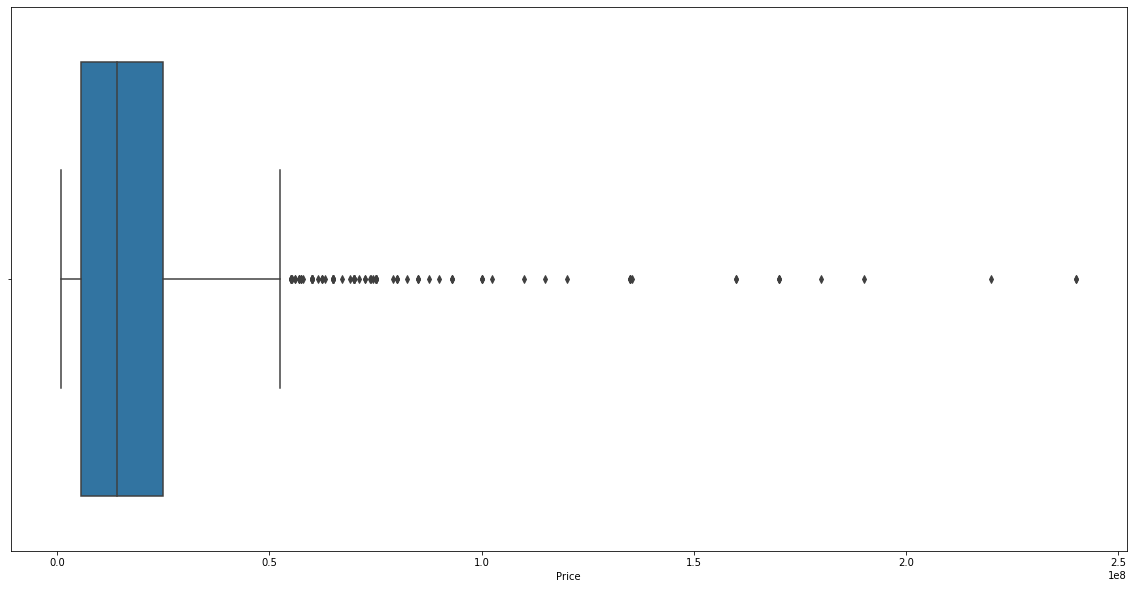

In [7]:
sns.boxplot(housedata["Price"])

In [15]:
from sklearn.linear_model import LinearRegression

y = housedata["Price"]
#X = housedata.drop("Price", axis=1)
X = housedata["Area"]
X = np.array(X).reshape(-1, 1)

lm_model = LinearRegression()
lm_model.fit(X, y)
y_pred = lm_model.predict(X)


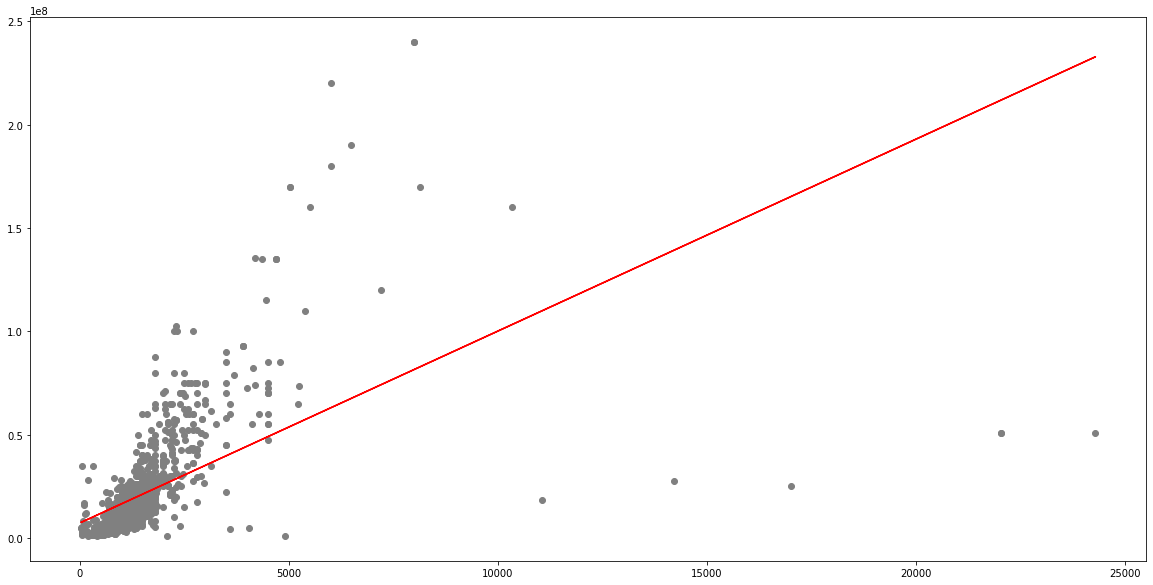

In [17]:
plt.scatter(X, y, color='gray')
plt.plot(X, y_pred, color='red')
plt.show()

## Quantile Regression

In [48]:
quantiles = np.arange(.05, .96, .1)
mod = smf.quantreg('Price ~ Area', housedata)
models = []

def fit_model(q):
    res = mod.fit(q=q)
    models.append(res)
    return [q, res.params["Intercept"], res.params['Area']] + res.conf_int().loc['Area'].tolist()

params = [fit_model(x) for x in quantiles]
result = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])

/home/jiin/anaconda3/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/home/jiin/anaconda3/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/home/jiin/anaconda3/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/home/jiin/anaconda3/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [49]:
result

,qt,intercept,x_coef,cf_lower_bound,cf_upper_bound
0,0.05,8.636895e-02,2098.765429,1481.256630,2716.274228
1,0.15,-2.486486e+05,5765.765766,5338.038087,6193.493444
2,0.25,-3.378947e+06,11286.549707,10987.069072,11586.030342
3,0.35,-4.400000e+06,13764.705850,13481.322062,14048.089638
4,0.45,-5.077273e+06,15949.494950,15671.906621,16227.083278
5,0.55,-5.727273e+06,18181.818182,17920.703639,18442.932724
6,0.65,-6.325000e+06,20535.714286,20255.265904,20816.162668
7,0.75,-6.740025e+06,23220.012720,22897.638652,23542.386788
8,0.85,-7.638467e+06,27728.023963,27308.326170,28147.721755
9,0.95,-1.940080e+06,30242.509939,28936.533815,31548.486064


In [54]:
models[0].params

Intercept       0.086369
Area         2098.765429
dtype: float64

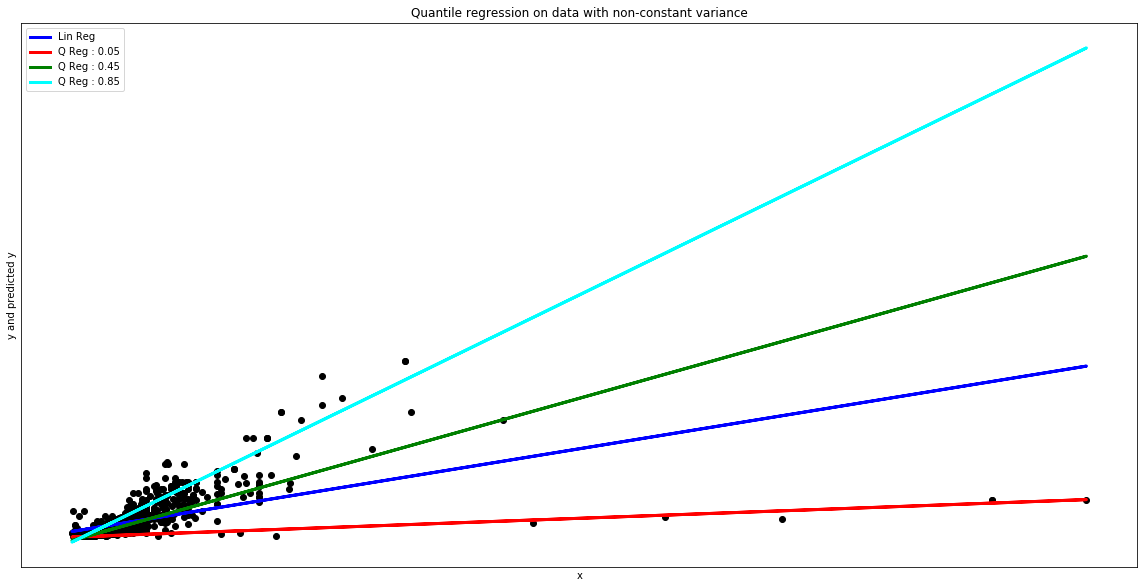

In [57]:
plt.figure(5)
plt.scatter(X, y,  color='black')
plt.plot(X, y_pred, color='blue',
         linewidth=3, label='Lin Reg')

y_qnt1 = models[0].params['Intercept'] + models[0].params['Area'] * X
plt.plot(X, y_qnt1, color='red',
         linewidth=3, label='Q Reg : 0.05')

y_qnt2 = models[4].params['Intercept'] + models[4].params['Area'] * X
plt.plot(X, y_qnt2, color='green',
         linewidth=3, label='Q Reg : 0.45')


y_qnt3 = models[8].params['Intercept'] + models[8].params['Area'] * X
plt.plot(X, y_qnt3, color='cyan',
         linewidth=3, label='Q Reg : 0.85')


plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

<Figure size 1440x720 with 0 Axes>

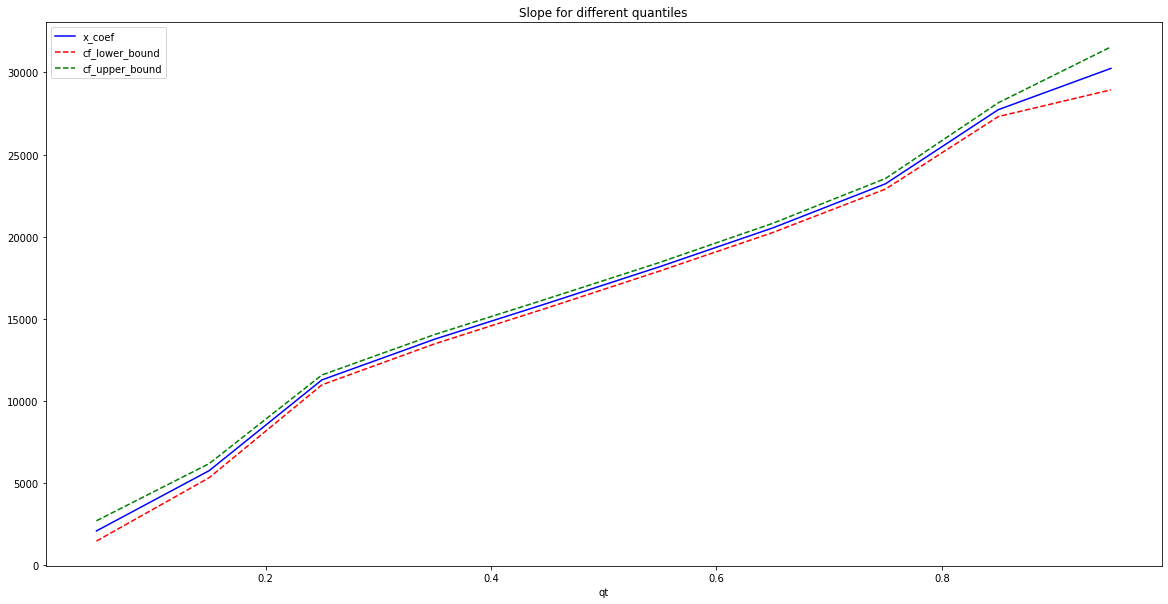

In [59]:
plt.figure(6)
result.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])